# (Newton)-Raphson-Simpson solution

This notebook implements one set of solutions for the NRS example (there are, of course, multiple approaches).

In [1]:
nrsδ(x, f, f′) = - f(x) / f′(x)

F(x) = x^3 - 8
dF(x) = 3x^2


dF (generic function with 1 method)

In [2]:
"""
    nrs(x, f, f′) 
uses (Newton), Raphson, Simpson method to improve an estimate of a zero of f
given an initial estimate x and the derivative of f, f′
(f and f′ should be scalar functions of x only)
returns an improved zero, within tolerance 1e-6 
"""
function nrs(x::Number, f, f′)
    ϵ = 1e-6
    x_n = x
    Δ = 1.0
    count = 0
    while abs(Δ) > ϵ && count < 40
        Δ= nrsδ(x, f, f′)
        x_n += Δ
        count += 1
    end
    x_n
end

nrs

## Part B: History storing variant

In [3]:
"""
    nrs([x], f, f′) 
uses (Newton), Raphson, Simpson method to improve an estimate of a zero of f
given an initial estimate x and the derivative of f, f′
(f and f′ should be scalar functions of x only)
returns the history of estimates of x, up to the final estimate within tolerance of 1e-6
"""
function nrs(xs::Vector{T}, f, f′) where T <: Number
    ϵ = 1e-6
    x_n = xs[end]
    xss = [x_n] #copy
    Δ = 1.0
    count = 0
    while abs(Δ) > ϵ && count < 40
        Δ= nrsδ(x_n, f, f′)
        x_n += Δ
        push!(xss, x_n)
        count += 1
    end
    xss
end    

nrs

In [4]:
"""
    nrs!([x], f, f′) 
uses (Newton), Raphson, Simpson method to improve an estimate of a zero of f
given an initial estimate x and the derivative of f, f′
(f and f′ should be scalar functions of x only)
returns the history of estimates of x, up to the final estimate within tolerance of 1e-6
modifies [x] in place!
"""
function nrs!(xs::Vector{T}, f, f′) where T <: Number
    ϵ = 1e-6
    x_n = xs[end]
    Δ = 1.0
    count = 0
    while abs(Δ) > ϵ && count < 40
        Δ= nrsδ(x_n, f, f′)
        x_n += Δ
        push!(xs, x_n)
        count += 1
    end
    xs
end 


nrs!

## Part C: Plotting

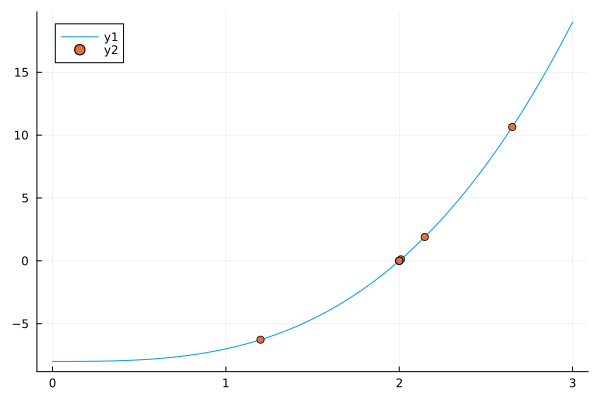

In [5]:
using Plots

plot(0.0:0.01:3.0, F)
history = nrs([1.2], F, dF)
scatter!(history, F)

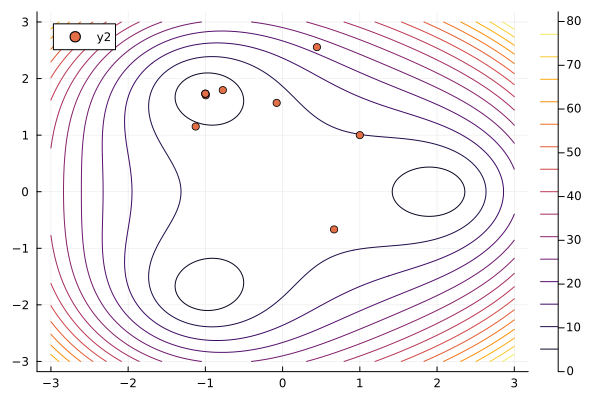

In [6]:
xyrange = -3.0:0.01:3.0
contour(xyrange, xyrange, (x,y)->abs(F(x+y*im)) ) 

history = nrs([1.0+1.0im], F, dF)
scatter!(real.(history),imag.(history))

## Advanced Extensions

### Coloured markers by ordering

For example, using `range` function to generate an appropriately long list of colours for markercolor, and Gray to map them to grayscale. 

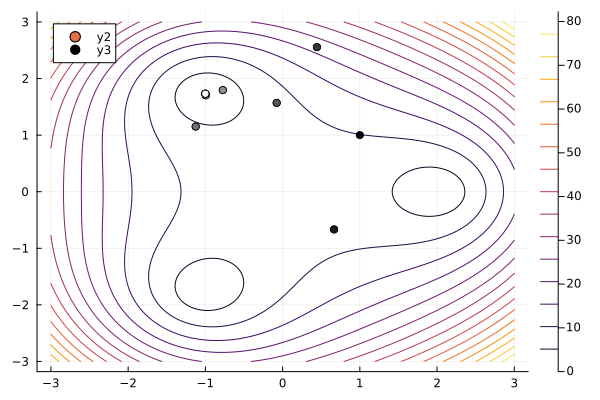

In [7]:

scatter!(real.(history), imag.(history), markercolor=Gray.(range(0.0,1.0, length=length(history))) )

### Automatic differentiation with Zygote

In [8]:
#using Pkg
#Pkg.add("Zygote")
using Zygote

nrsδ(x, f) = - f(x) / conj(gradient(xx->real(f(xx)), x))  #or real ∘ f if you want to use composition

"""
    nrs!([x], f) 
uses (Newton), Raphson, Simpson method to improve an estimate of a zero of f
given an initial estimate x
(f should be a holomorphic function of x and x only)
returns the history of estimates of x, up to the final estimate within tolerance of 1e-6
modifies [x] in place!
"""
function nrs!(xs::Vector{T}, f) where T <: Number
    ϵ = 1e-6
    x_n = xs[end]
    Δ = 1.0
    count = 0
    while abs(Δ) > ϵ && count < 40
        Δ= nrsδ(x_n, f)
        x_n += Δ
        push!(xs, x_n)
        count += 1
    end
    xs
end 

nrs!